In [1]:
#Ignore this code block and continue (it's for my use)
# Set your own project id here
#PROJECT_ID = 'your-google-cloud-project'
#from google.cloud import storage
#storage_client = storage.Client(project=PROJECT_ID)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import os

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
#Train set
Normal_train = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL')
Pneumonia_train = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA')

In [5]:
#Validation set
Normal_val = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL')
Pneumonia_val = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA')

In [6]:
print(Normal_train[:3])
print(Pneumonia_train[:3])
print(Normal_val[:3])
print(Pneumonia_val[:3])

['NORMAL2-IM-0569-0001.jpeg', 'NORMAL2-IM-0523-0001.jpeg', 'NORMAL2-IM-1285-0001.jpeg']
['person1415_virus_2425.jpeg', 'person162_virus_319.jpeg', 'person400_virus_794.jpeg']
['NORMAL2-IM-1427-0001.jpeg', '.DS_Store', 'NORMAL2-IM-1440-0001.jpeg']
['.DS_Store', 'person1947_bacteria_4876.jpeg', 'person1946_bacteria_4874.jpeg']


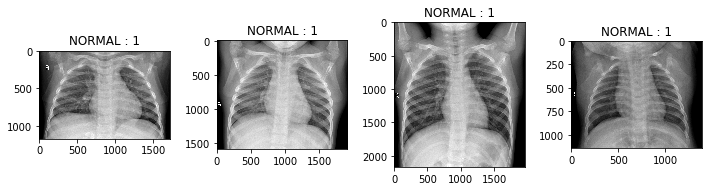

In [7]:
## Visualization for Normal Patients
plt.figure(figsize = (10,10))
for i in range(4):
    plt.subplot(1, 4 , i+1)
    img = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL' + "/" + Normal_train[i])
    plt.imshow(img)
    plt.title('NORMAL : 1')
    plt.tight_layout()
plt.show()

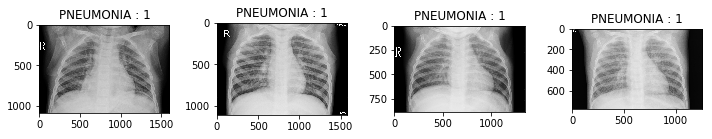

In [8]:
## Visualization for PNEUMONIA Patients
plt.figure(figsize = (10,10))
for i in range(4):
    plt.subplot(1, 4 , i+1)
    img = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA' + "/" + Pneumonia_train[i])
    plt.imshow(img)
    plt.title('PNEUMONIA : 1')
    plt.tight_layout()
plt.show()

In [9]:
image_arr_train =[]
labels_train = []

for img in Normal_train:
    try:
        image = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/' + img)
        image_from_array = Image.fromarray(image, 'RGB')  #Read in the image with PIL image function in colour mode.
        resize_img = image_from_array.resize((32, 32))  #Resize the image to 32 * 32
        image_arr_train.append(np.array(resize_img))
        labels_train.append(0)
        
    except AttributeError:
        print("An error occured while reading in the image")

for img in Pneumonia_train:
    try:
        image=cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/' + img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_from_array.resize((32, 32))
        image_arr_train.append(np.array(resize_img))
        labels_train.append(1)
        
    except AttributeError:
        print("An error occur while reading the image")

An error occured while reading in the image
An error occur while reading the image


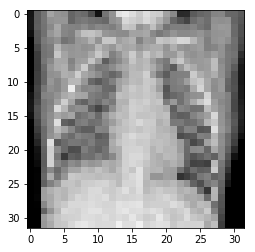

In [10]:
plt.imshow(image_arr_train[1])
plt.show()

In [11]:
# Read and preprocess evaluation images
image_arr_val =[]
labels_val = []

for img in Normal_val:
    try:
        image = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/' + img)
        image_from_array = Image.fromarray(image, 'RGB')  #Read in the image with PIL image function in colour mode.
        resize_img = image_from_array.resize((32, 32))  #Resize the image to 32 * 32
        image_arr_val.append(np.array(resize_img))
        labels_val.append(0)
        
    except AttributeError:
        print("An error occured while reading in the image")

for img in Pneumonia_val:
    try:
        image=cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/' + img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_from_array.resize((32, 32))
        image_arr_val.append(np.array(resize_img))
        labels_val.append(1)
        
    except AttributeError:
        print("An error occur while reading the image")

An error occured while reading in the image
An error occur while reading the image


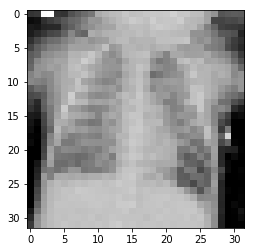

In [12]:
plt.imshow(image_arr_val[-1])
plt.show()

In [13]:
#shuffle images by getting the rows and using np.random for shuffle

#Train
train_data = np.array(image_arr_train)
train_labels = np.array(labels_train)
idx = np.arange(train_data.shape[0])
np.random.shuffle(idx)
train_data = train_data[idx]
train_labels = train_labels[idx]

#Validation
val_data = np.array(image_arr_val)
val_labels = np.array(labels_val)
idx = np.arange(val_data.shape[0])
np.random.shuffle(idx)
val_data = val_data[idx]
val_labels = val_labels[idx]

In [14]:
print("Shape of train set {}".format(train_data.shape))
print("Shape of val set {}".format(val_data.shape))

Shape of train set (5216, 32, 32, 3)
Shape of val set (16, 32, 32, 3)


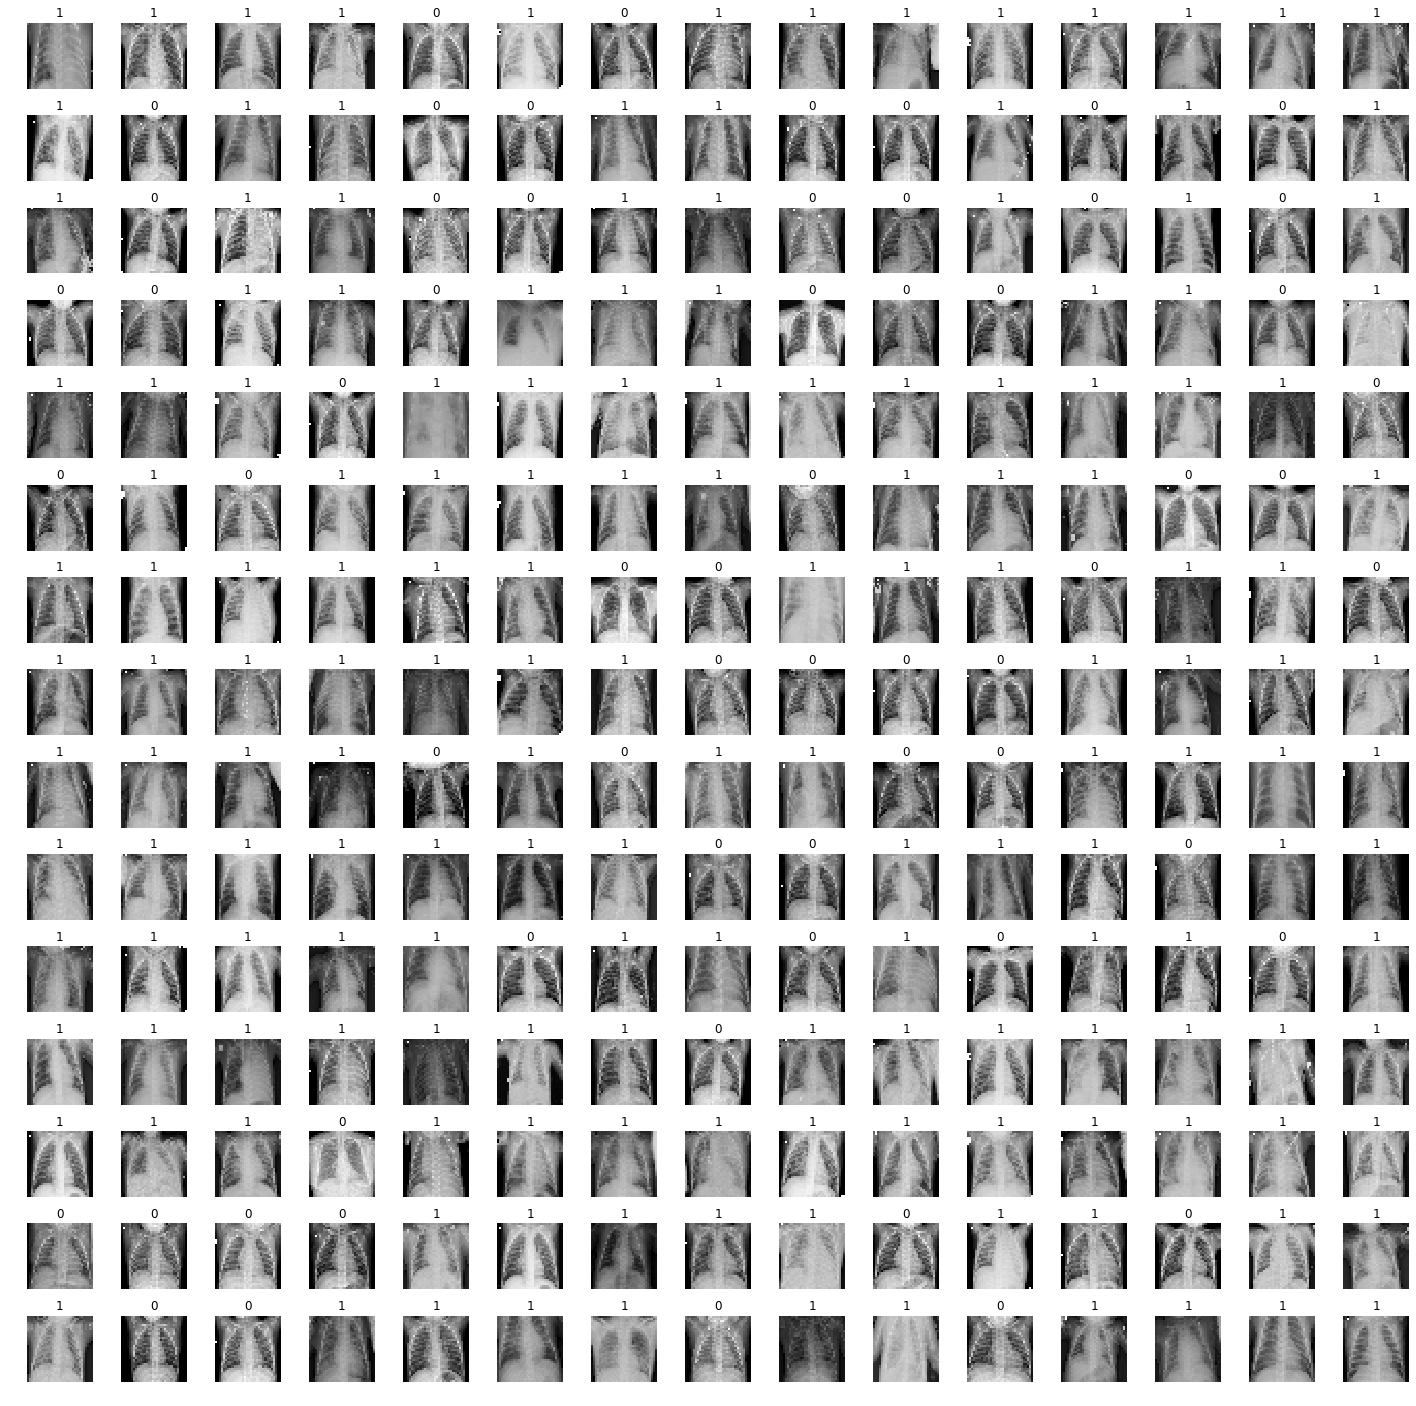

In [15]:
# visualize many at a go
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(W_grid, L_grid, figsize=(25, 25))
axes = axes.ravel() # To flatten to get W_grid * L_grid

n_training = len(train_data)

for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training) #pick a random number
    axes[i].imshow(train_data[index])
    axes[i].set_title(train_labels[index]) #set label of image as title ... you can comment this line 
    axes[i].axis('off') #comment this line to see effect
plt.subplots_adjust(hspace=0.4) #adjust spaces between images ...comment to see

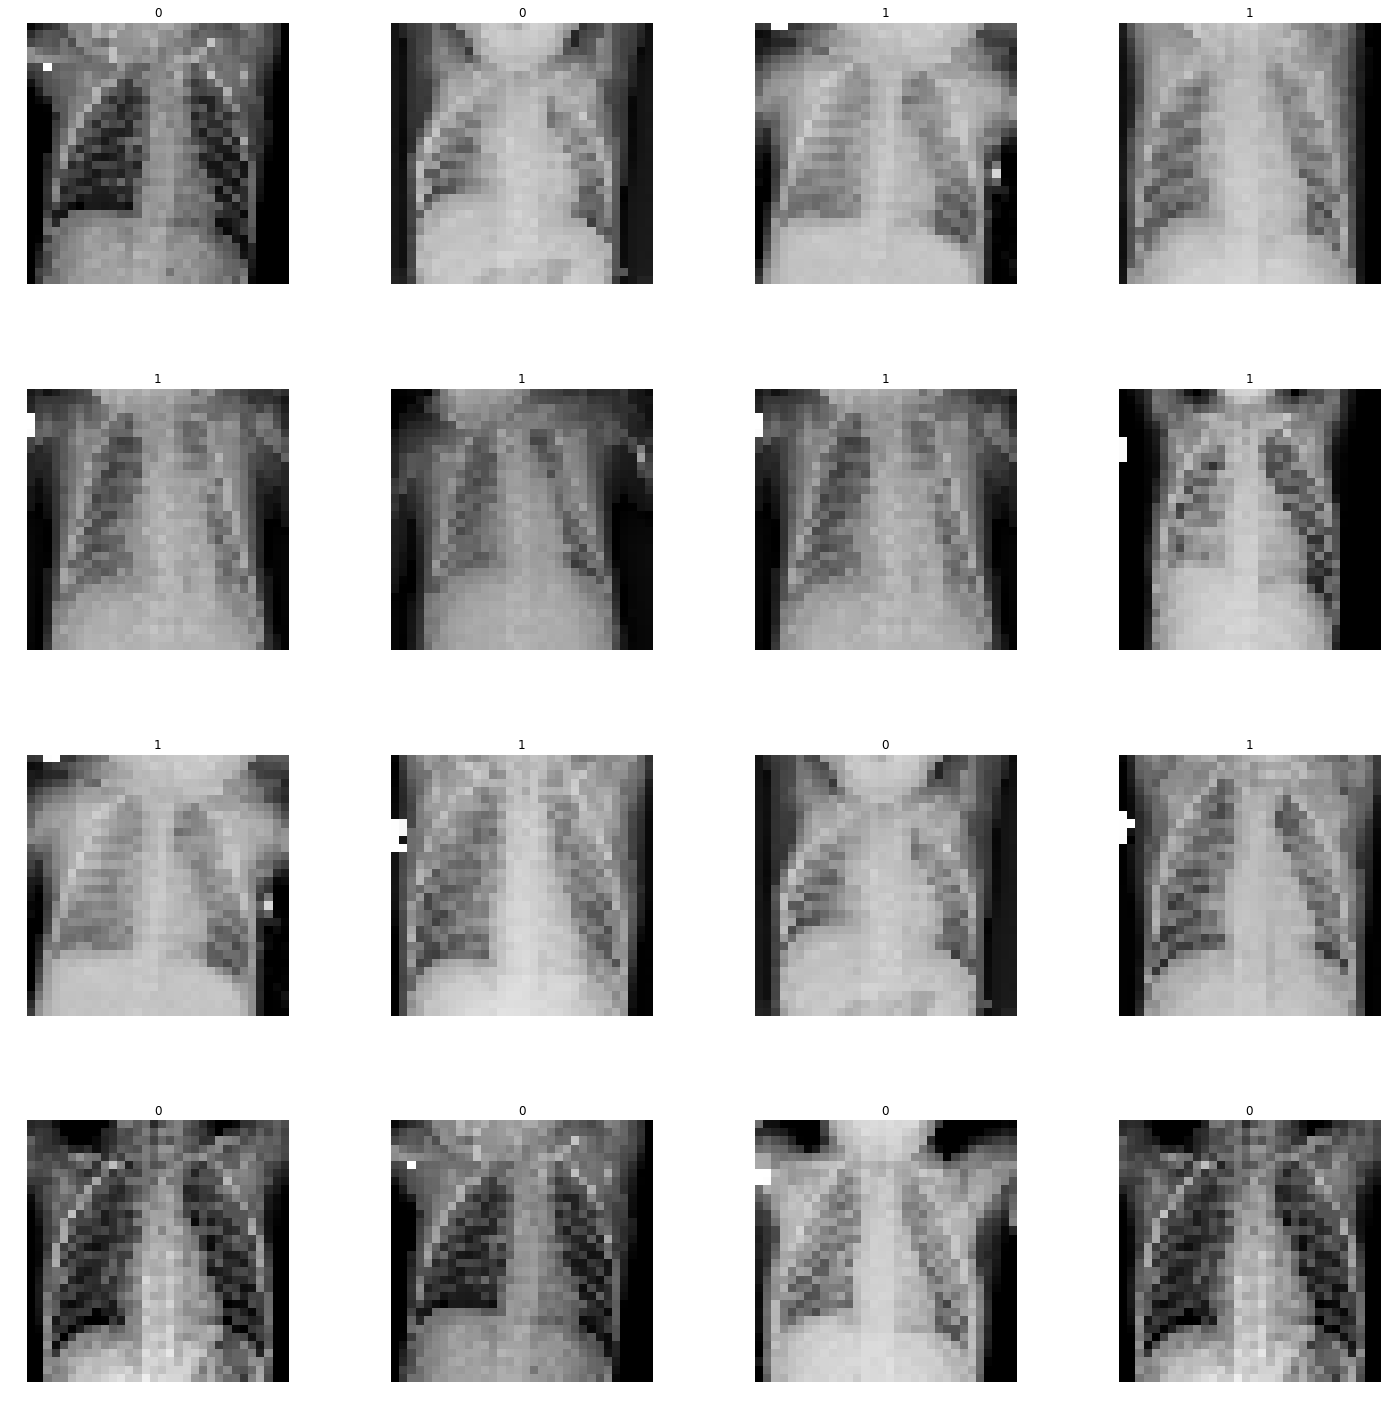

In [16]:
# visualize many at a go
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(W_grid, L_grid, figsize=(25, 25))
axes = axes.ravel() # To flatten to get W_grid * L_grid

n_training = len(val_data)

for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training) #pick a random number
    axes[i].imshow(val_data[index])
    axes[i].set_title(val_labels[index]) #set label of image as title ... you can comment this line 
    axes[i].axis('off') #comment this line to see effect
plt.subplots_adjust(hspace=0.4) #adjust spaces between images ...comment to see

In [17]:
X_train_gray = np.sum(train_data/3, axis=3, keepdims=True)
X_test_gray  = np.sum(val_data/3, axis=3, keepdims=True)

In [18]:
X_train_gray.shape

(5216, 32, 32, 1)

In [19]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128

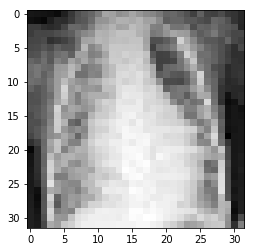

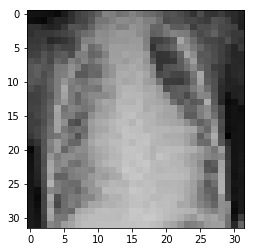

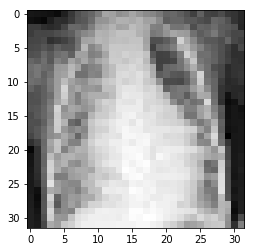

In [20]:
i = 700
plt.imshow(X_train_gray[i].squeeze(), cmap='gray') #gray scale image
plt.figure()
plt.imshow(train_data[i]) #actual image
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray') #normalized gray scale image

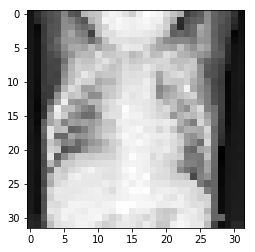

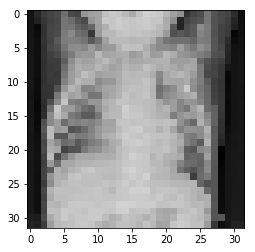

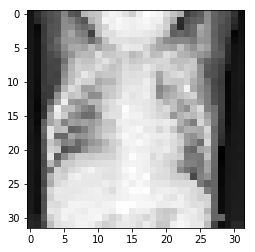

In [21]:
i = 10
plt.imshow(X_test_gray[i].squeeze(), cmap='gray') #gray scale image
plt.figure()
plt.imshow(val_data[i]) #actual image
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray') #normalized gray scale image

# STEP 4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [22]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [23]:
image_shape = X_train_gray[i].shape
image_shape

(32, 32, 1)

In [24]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=2, activation = 'softmax'))

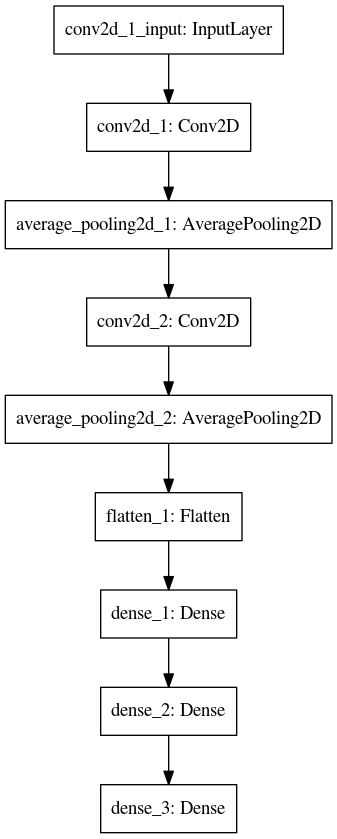

In [25]:
#Plot model
from keras.utils import plot_model
plot_model(cnn_model, to_file='model.png')

In [26]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [27]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [28]:
history = cnn_model.fit(X_train_gray_norm,
                        train_labels,
                        batch_size=50,
                        nb_epoch=200,
                        verbose=1
                        )

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/200
5216/5216 [==============================] - 3s 510us/step - loss: 0.3214 - accuracy: 0.8553
Epoch 2/200
5216/5216 [==============================] - 2s 406us/step - loss: 0.1589 - accuracy: 0.9377
Epoch 3/200
5216/5216 [==============================] - 2s 407us/step - loss: 0.1350 - accuracy: 0.9467
Epoch 4/200
5216/5216 [==============================] - 2s 393us/step - loss: 0.1220 - accuracy: 0.9515
Epoch 5/200
5216/5216 [==============================] - 2s 375us/step - loss: 0.1064 - accuracy: 0.9599
Epoch 6/200
5216/5216 [==============================] - 2s 397us/step - loss: 0.0992 - accuracy: 0.9649
Epoch 7/200
5216/5216 [==============================] - 2s 395us/step - loss: 0.0974 - accuracy: 0.9620
Epoch 8/200
5216/5216 [==============================] - 2s 393us/step - loss: 0.0846 - accuracy: 0.9664
Epoch 9/200
5216/5216 [==============================] - 2s 389us/step - loss: 0.0770 - accuracy: 0.9709
Epoch 10/200
5216/5216 [==============================]

In [29]:
score = cnn_model.evaluate(X_test_gray_norm, val_labels,verbose=1)
print('Test Accuracy : {:.4f}'.format(score[1]))

16/16 [==============================] - 0s 3ms/step
Test Accuracy : 0.7500


In [30]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = val_labels

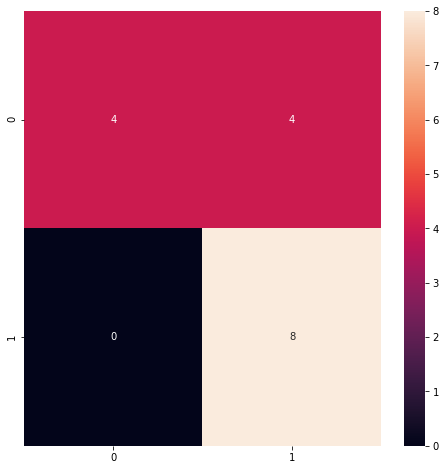

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot=True)

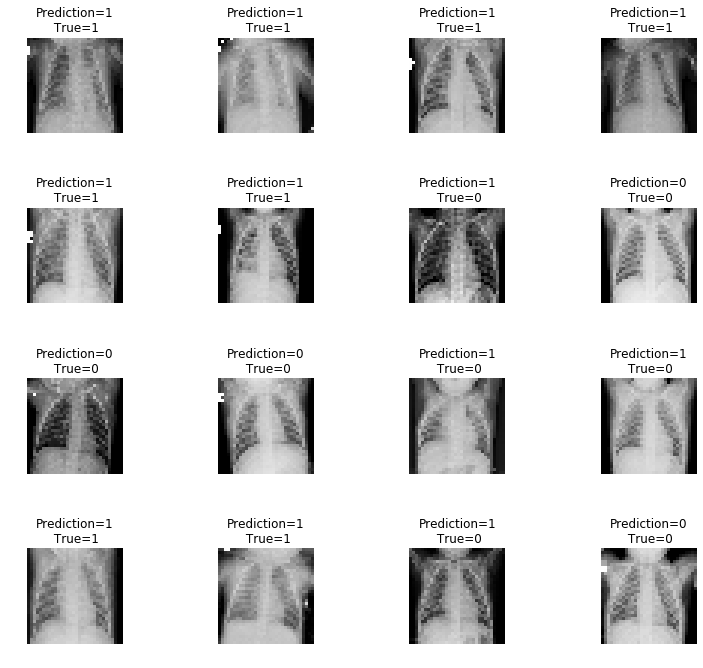

In [32]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(val_data[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)